## Introduction to Scikit-Learn (sklearn)

# 0. An end-to-end Scikit-Learn workflow


In [2]:
# 1. Get the data ready 
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# How to install a conda package into the current enviroment from a Jupyter Notebook

# import sys
# !conda install --yes --prefix {sys.prefix} packagename


In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create y (label)
y= heart_disease["target"]

In [5]:
#import warnings
#warnings.filterwarnings("default")

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)#80% for training

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_preds = clf.predict(X_test)

In [21]:
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [22]:
# 4.Evaluate the model
clf.score(X_train, y_train)

1.0

In [23]:
clf.score(X_test, y_test)

0.8032786885245902

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))
#it compares test label with predictions 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [25]:
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [26]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [27]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
     print(f"Trying model with {i} estimators...")
     model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
     print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100}%")
     print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 20 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 30 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 40 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 50 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 60 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 70 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 80 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 90 estimators...
Model accuracy on test set: 80.32786885245902%



In [28]:
# 6. Save a model and load it 
import pickle 

pickle.dump(clf, open("random_forst_model_1.pk1", "wb"))

In [29]:
loaded_model = pickle.load(open("random_forst_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

## 1. Getting the data ready to be used with machine learning

Three main things have to do:
    1. Split the data into features and labels (ussally X and y)
    2. Filling (also called imputing) or disregading missing values 
    3. Converting non-numerical values to numerical values (also calles feature endoding)

In [30]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
#we will use feature columns to predict y
X = heart_disease.drop("target", axis=1)# axis 1 means headings, axis =0 means first column
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
## Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)#80% for training

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [35]:
X.shape

(303, 13)

In [36]:
len(heart_disease)# total, just 242 for training

303

### we need to clean data> Trandform data > Reduce data
the more data we have the more CPU the more energy and cost to run the computation
get the same result with less data = smart

## 1.1 Make sure it's all numerical 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
car_sales["Doors"].value_counts() 
#4 in cat 856

4    856
5     79
3     65
Name: Doors, dtype: int64

In [4]:
len(car_sales)

1000

In [7]:
# splitinto X and y
X = car_sales.drop("Price", axis =1)
y = car_sales["Price"]

#split into training and test
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)#80% for training


In [9]:
#Turn the catogories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()#turn catogories into numbers
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],#transform this 
                                   remainder="passthrough") #the rest pass true don't do anything

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [44]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [45]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies #It converts categorical data into dummy or indicator variables.

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [46]:
# Let's refit the model
# Train the algorithm in the training data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values

1. Fill them with some value (imputation)
2. Remove the samples

In [48]:
# import care sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna().sum()# how many missing values 

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
#create x and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# let'try convert it to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()#turn catogories into numbers
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],#transform this 
                                   remainder="passthrough") #the rest pass true don't do anything

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option1: Fill missing data with Pandas

In [52]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [53]:
# fill missing data with Pandas
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [54]:
# check
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
# Remove rows with missing price value 
car_sales_missing.dropna(inplace=True)

In [56]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
len(car_sales_missing)

950

In [58]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [59]:
X= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()#turn catogories into numbers
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],#transform this 
                                   remainder="passthrough") #the rest pass true don't do anything

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing value Scikit-Learn

we can rescale the data when the variation is high (ex: between 6000 to 345000). read Extension: Feature Scaling

In [61]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
# Drop the rows with missing values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# Split into x and y
X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [65]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with name
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4) #  fill missing cell with 4
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_feature= ["Make", "Colour"]
door_feature= ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feature),# Name of imputer and feature
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [66]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [67]:
#check how many missing values
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [68]:
#covert cat to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()#turn catogories into numbers
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],#transform this 
                                   remainder="passthrough") #the rest pass true don't do anything

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [69]:
# Now we've got our data as numbers and filled (no missing data)
# let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()#find patterns
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2. choosing the right estimator and algorithm for your problem

Some things note:
Sklearn refers to machine learning models, algorithms as estimator.

Classification problem - predicting a category (heart disease or not)
* sometimes you'll see clf (short for classifier) used as a classification estimator

Regression problem - predicting a number (selling price of a car)
    
    
you can use sklearn machine learning map to choose

### 2.1 Picking a machine learning model for a regression problem 

let's use the california housing dataset

form Toy datasets

In [5]:
# Get california Housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
# we want to use the feature to predict the target
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
#we are trying to use first row values to predict MedHouseVal
#each row in data is a block group, go to data website to read


In [8]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [9]:
#First we will drop MedHouseVal column
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [76]:
# Import algrithm/estimator
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(12)

#Create the data
X = housing_df.drop("target", axis=1)
y= housing_df["target"]# median house price in $10,000s

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model model (on the test set) same as R^2=it measures the relatioship between two models. 
#the high the better
model.score(X_test, y_test)


0.6156526279884698

#how can we imporve the R^2 value 

what if `Ridge` didn't wor or the score didn't fit our needs?

well, we can try different model...

How about we try an ensemble model

In [77]:
# Import RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random Seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.8066196804802649

## 2.2 Picking a machine learning model for a classification model 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [78]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [79]:
len(heart_disease)

303

In [80]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup randm seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaniate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [81]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [82]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup randm seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaniate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

In [83]:
##I got same results in both models but he got 0.4 for LinearSVC

## Note

1. If you have structured data, use ensemble methods 
2. If you have unstructured data (images,audio..), use deep learning or transfer learning


## 3. Fit the model/algorithm on our data and to make predictions

* X = features, features variables, data
* y = labels, targets, target variables


In [84]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup randm seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaniate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Fit the model to the data : will go through data x values and see how they give us the y (target) what is the pattern
#training machine learning 
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns that has learned)
clf.score(X_test, y_test)

0.8688524590163934

In [85]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [86]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [87]:
# Use a training model to make predictions
clf.predict(np.array[1,2,3,4]) # this doesn't work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [88]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [89]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [90]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [91]:
# Compare predictions to truth labels to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test )

0.8688524590163934

In [92]:
clf.score(X_test, y_test)

0.8688524590163934

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

### Make predictions with predict_proba()

In [94]:
# Predict_proba returns probabilities of a classification label 
clf.predict_proba(X_test[:5])# first 5
#when we add each row will give us 1 
#[x,y] x>y will give us zero 

array([[0.87, 0.13],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.92, 0.08],
       [0.21, 0.79]])

In [95]:
# Let's predict() on the same data
# 1 for heart disease, zero for non
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used in regression

In [100]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance 
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [97]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [98]:
# We want our predictions same us target format
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [101]:
len(y_preds)

4128

In [102]:
len(y_test)

4128

In [103]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [104]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evalute Scikit-Learn models/estimators:
* Estimator's built-in `score` method
* The `scoring` parameter
* Problem-specific metric functions

### 4.1 Evaluating a model with score method

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Setup randm seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaniate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Fit the model to the data : will go through data x values and see how they give us the y (target) what is the pattern
#training machine learning 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
clf.score(X_train, y_train)

1.0

In [107]:
clf.score(X_test, y_test)

0.8688524590163934

let's use the score() on our regression problem

In [108]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance 
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
model.score(X_test, y_test)# it's R^2

0.8066196804802649

In [110]:
y_test.mean()

2.0550030959302275

### 4.2 Evaluating a model using scoring parameter

In [111]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier


# Setup randm seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaniate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [112]:
clf.score(X_test, y_test)

0.8524590163934426

In [113]:
#it will do 5-fold, this why we have f values. we can change the cv
cross_val_score(clf, X, y) #cv=10)#cross-validationcross_val_score(clf, X, y, cv=10)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [114]:
np.random.seed(42)

#Single training and test split score
clf_single_score= clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [115]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics 

1. Accuracy
2. Area under ROC curve 
3. Confusion matrix
4. Classification report

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Setup randm seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Instaniate Random Forest Classifier
clf = RandomForestClassifier()
cross_val_score= cross_val_score(clf, X, y)

In [117]:
np.mean(cross_val_score)

0.8248087431693989

In [118]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)* 100:2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.480874%


**Area under the receiver operating curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves a comparison a model's true positive (trp) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0 
* True negative = model predicts 0 when truth is 0 
* False negative = model predicts 0 when truth is 1 

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities 
y_probs= clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [121]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [122]:
# Calculate fpr, tpr, and thresholds
#fpr: false positive rate : model predicts 1 and truth is 0
#tpr: True positive rate : model predicts 1 and truth is 1 
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

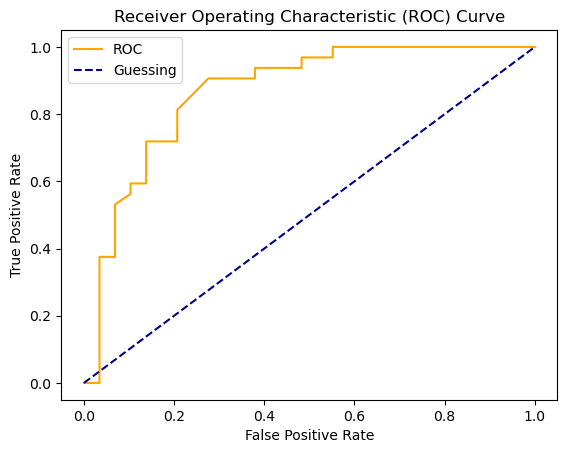

In [123]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)


In [124]:
#we will calculate area under curve = under ROC without the line 
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

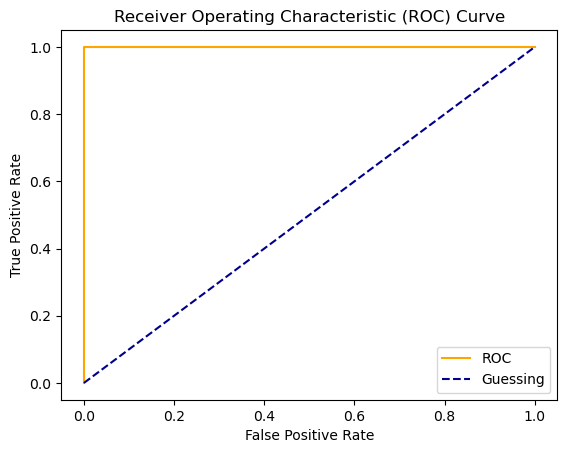

In [125]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [126]:
# Perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

** Confusion Matrix

A quick way to compare the labels a model predicts and the actual lables it was supposed to predict. In essence, giving you an idea of where the model is getting confused. 

In [127]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [128]:
# Visualize confusion marix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Axtual Label"],
            colnames=["Predicted Lables"])

Predicted Lables,0,1
Axtual Label,,
0,23,6
1,6,26


In [129]:
len(X_test) #sames as total 5+22+7+27

61

<AxesSubplot:>

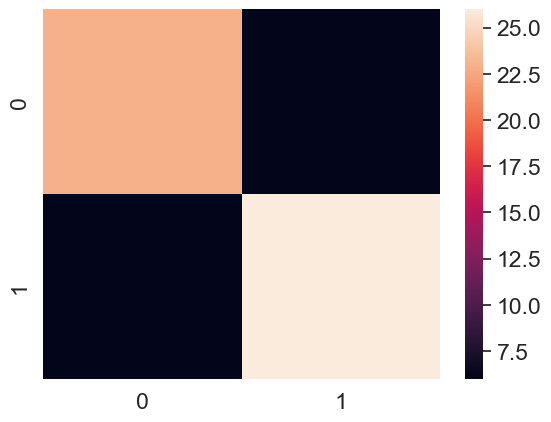

In [130]:
# Make our confusion matrix more cisual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

### Creating a confusion matric using skikit-Learn

To use the new methods of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+

In [131]:
import sklearn
sklearn.__version__

'1.0.2'

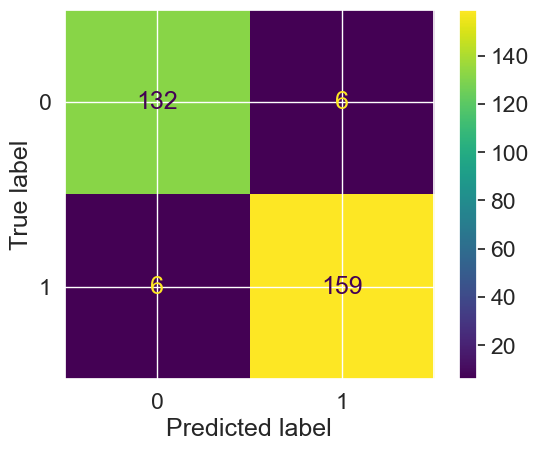

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

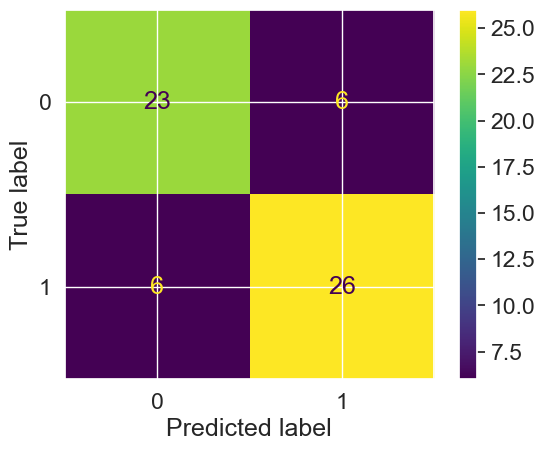

In [134]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

Classification Report

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds)) 
#research and read more about them 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [139]:
# Where precision and recall becoe valuable 
disease_true = np.zeros(10000)
disease_true[0] =1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0 

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

    * Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
    * Precision and recall become more important when classes are imbalanced. 
    * If false positive predictions are worse than false negatives, aim for higher precision.
    * If false negative predictions are worse than false positives, aim for higher recall.
    * F1-score is a combination of precision and recall. 
    

### 4.2.2 Regression model evaluation metrics

Model 1 Evaluation metrics documentation

The ones we're going to cover:
1. R^2 (coefficient of determination) : Perfect prediction will get R^2=1 
2. Mean absolute error (MAE)
3. Mean Squared error (MSE)



In [140]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [141]:
model.score(X_test, y_test)

0.8066196804802649

In [142]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [145]:
from sklearn.metrics import r2_score

# Fill an array with y_test_mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [147]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [150]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [151]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

***Mean absolute error (MAE)***

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are

In [153]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [156]:
df = pd.DataFrame(data={"actual values": y_test,
                         "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [155]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [159]:
df["differences"].mean()

0.012106921874999557

In [161]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32657218427810186

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [163]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [164]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [166]:
# calculate mse by hand
squared = np.square(df["differences"])
squared.mean()

0.253407306913755

In [170]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [171]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [172]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2572832072079409

In [173]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [174]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

0.7333540351264827

**Read which regression metric you should use** 

**Classification Model Evaluation Metrics/Techniques**

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?**

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques**

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use?**

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).


### 4.2.3 Finally using the scoring parameter

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [179]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, scoring=None)#if scoring =None, estimators's default scoring evaluation metric is used (accuracy for classification models)
cv_acc
#we can set cv value, it it already set it to 5

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [180]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [181]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [182]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [184]:
# Precision

cv_precision = cross_val_score(clf,X,y, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [190]:
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8085601538512754


In [191]:
# Recall 
cv_recall = cross_val_score(clf,X,y,scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [196]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")
#for all scoring parameter the higher the value the better the model

The cross-validated recall is: 0.8424242424242424


let's see the scoring parameter for a regression problem...

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [11]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [12]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [13]:
#Mean absolute error
cv_mse = cross_val_score(model, X, y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46281833778669723

In [14]:
cv_mse#the close to zero the best 

array([-0.51821856, -0.3315067 , -0.53872975])

In [15]:
# Mean squared error
cv_mae = cross_val_score(model, X, y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820332646560079

In [16]:
cv_mae

array([-0.51737186, -0.4219676 , -0.50676033])

## 4.3 using different evaluations metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X =housing_df.drop(['target'],axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)